In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nilearn import image, plotting

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [2]:
# https://towardsdatascience.com/using-neural-networks-for-a-functional-connectivity-classification-of-fmri-data-ff0999057bc6

from nilearn import datasets
num = 40
adhd_data = datasets.fetch_adhd(n_subjects=num)
func = adhd_data.func

/Volumes/conda/jdrussell3/lib/python3.7/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)



Dataset created in /Users/jdrussell3/nilearn_data/adhd



 ...done. (1 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/74a52d3552145e11365bb68453d1a70c/adhd40_metadata.tgz..... done.
/Volumes/conda/jdrussell3/lib/python3.7/site-packages/nilearn/datasets/func.py:459: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


Downloaded 37863424 of 44414948 bytes (85.2%,    0.4s remaining) ...done. (8 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0010042.tgz..... done.


Downloaded 42450944 of 45583539 bytes (93.1%,    0.1s remaining) ...done. (4 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0010064.tgz..... done.


Downloaded 37756928 of 45461055 bytes (83.1%,    0.4s remaining) ...done. (4 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0010128.tgz..... done.


Downloaded 33275904 of 46216320 bytes (72.0%,    0.8s remaining) ...done. (4 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0021019.tgz..... done.


Downloaded 19783680 of 20407901 bytes (96.9%,    0.0s remaining) ...done. (2 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0023008.tgz..... done.


Downloaded 19513344 of 20706939 bytes (94.2%,    0.1s remaining) ...done. (2 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0023012.tgz..... done.


Downloaded 63692800 of 72402326 bytes (88.0%,    0.4s remaining) ...done. (26 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0027011.tgz..... done.


Downloaded 67747840 of 76184603 bytes (88.9%,    0.4s remaining) ...done. (6 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0027018.tgz..... done.


Downloaded 57131008 of 70074120 bytes (81.5%,    0.7s remaining) ...done. (6 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0027034.tgz..... done.


Downloaded 61456384 of 69291635 bytes (88.7%,    0.4s remaining) ...done. (6 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0027037.tgz..... done.


Downloaded 41533440 of 41803342 bytes (99.4%,    0.0s remaining) ...done. (4 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1019436.tgz..... done.


Downloaded 19251200 of 20763649 bytes (92.7%,    0.1s remaining) ...done. (2 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1206380.tgz..... done.


Downloaded 17416192 of 20168043 bytes (86.4%,    0.2s remaining) ...done. (2 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1418396.tgz..... done.


Downloaded 39714816 of 62682233 bytes (63.4%,    1.2s remaining) ...done. (5 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1517058.tgz..... done.


Downloaded 17416192 of 20196558 bytes (86.2%,    0.2s remaining) ...done. (2 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1552181.tgz..... done.


Downloaded 55533568 of 60663491 bytes (91.5%,    0.3s remaining) ...done. (5 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1562298.tgz..... done.


Downloaded 20430848 of 20628764 bytes (99.0%,    0.0s remaining) ...done. (2 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1679142.tgz..... done.


Downloaded 19972096 of 33119052 bytes (60.3%,    0.7s remaining) ...done. (3 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_2014113.tgz..... done.


Downloaded 42188800 of 45455025 bytes (92.8%,    0.2s remaining) ...done. (4 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_2497695.tgz..... done.


Downloaded 40091648 of 57992968 bytes (69.1%,    0.9s remaining) ...done. (5 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_2950754.tgz..... done.


Downloaded 63946752 of 67925261 bytes (94.1%,    0.2s remaining) ...done. (6 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3007585.tgz..... done.


Downloaded 20168704 of 32919780 bytes (61.3%,    0.6s remaining) ...done. (3 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3154996.tgz..... done.


Downloaded 56918016 of 59835286 bytes (95.1%,    0.2s remaining) ...done. (5 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3205761.tgz..... done.


Downloaded 41517056 of 61857076 bytes (67.1%,    1.0s remaining) ...done. (5 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3520880.tgz..... done.


Downloaded 38780928 of 59385206 bytes (65.3%,    1.1s remaining) ...done. (5 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3624598.tgz..... done.


Downloaded 40091648 of 41518251 bytes (96.6%,    0.1s remaining) ...done. (4 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3699991.tgz..... done.


Downloaded 18604032 of 32108848 bytes (57.9%,    0.7s remaining) ...done. (3 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3884955.tgz..... done.


Downloaded 18464768 of 39415752 bytes (46.8%,    1.1s remaining) ...done. (3 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3902469.tgz..... done.


Downloaded 46383104 of 59297020 bytes (78.2%,    0.6s remaining) ...done. (4 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3994098.tgz..... done.


 ...done. (2 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_4016887.tgz..... done.


Downloaded 14925824 of 21375806 bytes (69.8%,    0.5s remaining) ...done. (2 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_4046678.tgz..... done.


Downloaded 57950208 of 69914913 bytes (82.9%,    0.6s remaining) ...done. (6 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_4134561.tgz..... done.


Downloaded 44023808 of 45506732 bytes (96.7%,    0.1s remaining) ...done. (4 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_4164316.tgz..... done.


Downloaded 18989056 of 32363673 bytes (58.7%,    0.7s remaining) ...done. (3 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_4275075.tgz..... done.


Downloaded 61988864 of 73484949 bytes (84.4%,    0.6s remaining) ...done. (6 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_6115230.tgz..... done.


Downloaded 21839872 of 42188959 bytes (51.8%,    0.9s remaining) ...done. (3 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_7774305.tgz..... done.


Downloaded 58310656 of 70396354 bytes (82.8%,    0.6s remaining) ...done. (6 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_8409791.tgz..... done.


Downloaded 41009152 of 45075978 bytes (91.0%,    0.2s remaining) ...done. (4 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_8697774.tgz..... done.


Downloaded 57344000 of 63380505 bytes (90.5%,    0.3s remaining) ...done. (5 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_9744150.tgz..... done.


Downloaded 18595840 of 46607053 bytes (39.9%,    1.5s remaining) ...done. (3 seconds, 0 min)
Extracting data from /Users/jdrussell3/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_9750701.tgz..... done.


In [11]:
from nilearn import decomposition

canica = decomposition.CanICA(n_components=20, mask_strategy='background')
canica.fit(func)


CanICA(mask_strategy='background')

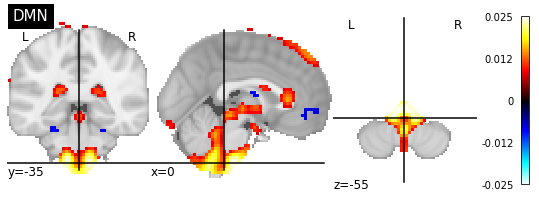

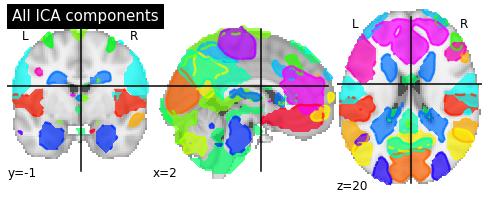

In [12]:
#Retrieving the components
components = canica.components_

#Using a masker to project into the 3D space
components_img = canica.masker_.inverse_transform(components)

#Plotting the default mode network (DMN) without region extraction
plotting.plot_stat_map(image.index_img(components_img, 9), title='DMN')
plotting.show()

#Plotting all the components
plotting.plot_prob_atlas(components_img, title='All ICA components')
plotting.show()

In [13]:
#Using a filter to extract the regions time series 
from nilearn import input_data
masker = input_data.NiftiMapsMasker(components_img, smoothing_fwhm=6, standardize=False, detrend=True,
                                    t_r=2.5, low_pass=0.1, high_pass=0.01)

#Computing the regions signals and extracting the phenotypic information of interest
subjects = []
adhds = []
sites = []
labels = []
for func_file, confound_file, phenotypic in zip(adhd_data.func, adhd_data.confounds, adhd_data.phenotypic):
    time_series = masker.fit_transform(func_file, confounds=confound_file)
    subjects.append(time_series)
    is_adhd = phenotypic['adhd']
    if is_adhd == 1:
        adhds.append(time_series)    
    sites.append(phenotypic['site'])
    labels.append(phenotypic['adhd'])

In [1]:
#Comparing the three types of functional connectivity between the regions of interest
from nilearn.connectome import ConnectivityMeasure

correlations = ConnectivityMeasure(kind='correlation', vectorize=True).fit_transform(subjects)
subjects[1]

NameError: name 'subjects' is not defined

In [73]:
correlations[1]

array([ 0.70710678, -0.0598647 ,  0.70710678, -0.00257618,  0.12752685,
        0.70710678, -0.23344883,  0.13732374, -0.18083616,  0.70710678,
        0.34703609, -0.21045583,  0.05479639, -0.13014756,  0.70710678,
       -0.1924625 , -0.1857406 , -0.01957292, -0.32377657, -0.03825874,
        0.70710678,  0.1176517 , -0.36634189, -0.04195822, -0.09675427,
        0.3612484 ,  0.18613711,  0.70710678, -0.04547227, -0.2035518 ,
       -0.26697454,  0.03102981,  0.05569987,  0.1236893 , -0.17226332,
        0.70710678, -0.29492649,  0.16924064,  0.05336769, -0.19335949,
       -0.22983329,  0.27558661, -0.20627576, -0.04327768,  0.70710678,
        0.08191212, -0.21636787, -0.08673202,  0.06203174,  0.03636735,
       -0.01913663,  0.3223477 , -0.2424358 , -0.31594792,  0.70710678,
        0.09675399, -0.16314332,  0.13551998, -0.14337966, -0.11921152,
       -0.09885405, -0.05636552, -0.04241984, -0.21477804,  0.07571461,
        0.70710678,  0.20883757,  0.45568484,  0.13810661,  0.16

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(correlations, labels, test_size=0.3)


array([[ 0.70710678, -0.27145702,  0.70710678, ..., -0.32244658,
        -0.00598505,  0.70710678],
       [ 0.70710678, -0.1134826 ,  0.70710678, ..., -0.32566649,
        -0.17509736,  0.70710678],
       [ 0.70710678, -0.16101237,  0.70710678, ..., -0.11725335,
        -0.40848637,  0.70710678],
       ...,
       [ 0.70710678,  0.05210957,  0.70710678, ..., -0.28895238,
        -0.08844793,  0.70710678],
       [ 0.70710678, -0.09372952,  0.70710678, ...,  0.01093058,
        -0.0280459 ,  0.70710678],
       [ 0.70710678, -0.21137695,  0.70710678, ...,  0.08718333,
        -0.01751809,  0.70710678]])

In [42]:
#Creating the classification model
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(32, activation='tanh', kernel_initializer='random_normal', input_shape=connectivity_biomarkers['correlation'].shape[1:]))
#Second  Hidden Layer
classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal'))
#Third  Hidden Layer
classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [43]:
classifier.compile(optimizer = Adam(lr =.0001),loss='binary_crossentropy', metrics =['accuracy'])

In [71]:
classifier.fit(X_train,np.array(y_train), batch_size=32, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6798 - accuracy: 0.7143
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6794 - accuracy: 0.7143
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6791 - accuracy: 0.7143
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6788 - accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 51ms/step - loss: 0.6784 - accuracy: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6781 - accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6777 - accuracy: 0.7500
Epoch 8/100
1/1 [==============================] - 0s 36ms/step - loss: 0.6773 - accuracy: 0.7500
Epoch 9/100
1/1 [==============================] - 0s 53ms/step - loss: 0.6770 - accuracy: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6766 - accuracy: 0.7857
Epoch 11/100
1/1 [====

Epoch 84/100
1/1 [==============================] - 0s 22ms/step - loss: 0.6247 - accuracy: 0.9643
Epoch 85/100
1/1 [==============================] - 0s 28ms/step - loss: 0.6237 - accuracy: 0.9643
Epoch 86/100
1/1 [==============================] - 0s 25ms/step - loss: 0.6226 - accuracy: 0.9643
Epoch 87/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6216 - accuracy: 0.9643
Epoch 88/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6205 - accuracy: 0.9643
Epoch 89/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6194 - accuracy: 0.9643
Epoch 90/100
1/1 [==============================] - 0s 23ms/step - loss: 0.6184 - accuracy: 0.9643
Epoch 91/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6173 - accuracy: 0.9643
Epoch 92/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6162 - accuracy: 0.9643
Epoch 93/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6150 - accuracy: 0.9643
Epoch 94/100

In [64]:
connectivity_biomarkers['correlation']
adhd_correlations

[array([[ 1.00000000e+00, -2.76755124e-01, -9.72136706e-02,
          9.48622897e-02,  2.63627976e-01, -4.17845756e-01,
         -4.01674397e-02,  8.13083947e-02,  1.78241357e-01,
          1.59032773e-02, -6.05329163e-02, -8.64787251e-02,
         -1.77201599e-01, -1.43247381e-01,  1.25044316e-01,
         -2.09885575e-02,  3.86450797e-01,  2.65779585e-01,
          2.25207340e-02, -1.29192516e-01],
        [-2.76755124e-01,  1.00000000e+00, -2.66673088e-01,
          3.38707328e-01, -5.38744330e-01,  1.04133254e-02,
         -4.28114176e-01, -1.36158839e-01,  2.14103788e-01,
         -2.39412278e-01, -2.85643548e-01,  4.69689339e-01,
          2.09682778e-01,  1.17464125e-01,  1.64564192e-01,
         -3.86820555e-01, -3.70844990e-01,  5.93092181e-02,
          1.24261603e-01,  8.76173973e-02],
        [-9.72136706e-02, -2.66673088e-01,  1.00000000e+00,
         -3.53616446e-01, -9.26142856e-02,  9.88633856e-02,
          1.24854609e-01, -3.00569475e-01, -1.01837635e-01,
         -1.

In [51]:
type(connectivity_biomarkers['correlation'])

numpy.ndarray